In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

first_experiment_df = pd.read_csv('Coffee Filter 1.csv')
second_experiment_df = pd.read_csv('Coffee Filter 2.csv')


first_experiment_df

second_experiment_df 




,Time (s) Run #1,Position (m) Run #1,Velocity (m/s) Run #1,Acceleration (m/s²) Run #1,Time (s) Run #2,Position (m) Run #2,Velocity (m/s) Run #2,Acceleration (m/s²) Run #2,Time (s) Run #3,Position (m) Run #3,...,Velocity (m/s) Run #8,Acceleration (m/s²) Run #8,Time (s) Run #9,Position (m) Run #9,Velocity (m/s) Run #9,Acceleration (m/s²) Run #9,Time (s) Run #10,Position (m) Run #10,Velocity (m/s) Run #10,Acceleration (m/s²) Run #10
0,0.00,1.23,NaN,NaN,0.00,1.34,NaN,NaN,0.00,1.32,...,NaN,NaN,0.00,1.39,NaN,NaN,0.00,1.35,NaN,NaN
1,0.02,1.21,-0.61,NaN,0.02,1.34,-0.35,NaN,0.02,1.30,...,0.30,NaN,0.02,1.39,-0.000827,NaN,0.02,1.35,0.06,NaN
2,0.04,1.20,-0.65,-1.85,0.04,1.33,-0.46,-3.63,0.04,1.31,...,0.26,-5.64,0.04,1.39,-0.040000,-2.27,0.04,1.35,0.02,-2.52
3,0.06,1.19,-0.68,-1.00,0.06,1.32,-0.50,-1.46,0.06,1.31,...,0.08,-8.04,0.06,1.39,-0.090000,-2.15,0.06,1.34,-0.04,-3.46
4,0.08,1.17,-0.70,-0.07,0.08,1.31,-0.47,-0.73,0.08,1.30,...,-0.19,-5.48,0.08,1.38,-0.130000,-0.97,0.08,1.35,-0.16,-2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- In this assignment, we have to clean up the data 

- We want to slice the data frame. We need to clean the data that is before you drop the coffee filter, and clean up the spikes that come after the coffee filter hits the ground

- The code below will be to clean the first experiment

In [2]:
# first_experiment_df.dropna(inplace = True)

first_runs = {}

for i in range(2, 12):
    first_runs[f'run_{i}'] = first_experiment_df[[ f'Time (s) Run #{i}',f'Position (m) Run #{i}',f'Velocity (m/s) Run #{i}',f'Acceleration (m/s²) Run #{i}']]


# first_runs['run_2'] = first_runs['run_2'].loc[first_runs['run_2'].index.difference([2, 3, 4] + list(range(39, 94)))]

for j in range(2, 12):
    drop_indices = [0, 1, 2, 3, 4]

    position_col = f'Position (m) Run #{j}'

    for i in range(35, len(first_runs[f'run_{j}']) - 1):
        if first_runs[f'run_{j}'][position_col].iloc[i + 1] > first_runs[f'run_{j}'][position_col].iloc[i]:
            drop_indices.extend((range(i, min(94, len(first_runs[f'run_{j}'])))))
    
        
    first_runs[f'run_{j}'] = first_runs[f'run_{j}'].drop(index = set(drop_indices), errors='ignore').drop_duplicates(subset = position_col)

        
# first_runs['run_2'] = first_runs['run_2'].loc[first_runs['run_2'].index.difference([2, 3, 4] + list(range(i, 94)))]


# first_runs['run_3'] = first_runs['run_3'].loc[first_runs['run_3'].index.difference(list(range(32, 94)))]

# first_runs['run_4'] = first_runs['run_4'].loc[first_runs['run_4'].index.difference([0, 1, 2, 3, 4] + list(range(40, 94)))]

# first_runs['run_5'] = first_runs['run_5'].loc[first_runs['run_5'].index.difference(list(range(0, 9)) + list(range(50, 94)))]

# first_runs['run_6'] = first_runs['run_6'].loc[first_runs['run_6'].index.difference(list(range(32, 94)))]

# first_runs['run_7'] = first_runs['run_7'].loc[first_runs['run_7'].index.difference(list(range(35, 94)))]

# first_runs['run_8'] = first_runs['run_8'].loc[first_runs['run_8'].index.difference(list(range(0, 7)) + list(range(53, 94)))]

# first_runs['run_9'] = first_runs['run_9'].loc[first_runs['run_9'].index.difference(list(range(0, 11)) + list(range(54, 94)))]

# first_runs['run_10'] = first_runs['run_10'].loc[first_runs['run_10'].index.difference([0, 1, 2] + list(range(57, 94)))]

# first_runs['run_11'] = first_runs['run_11'].loc[first_runs['run_11'].index.difference(list(range(0, 9)) + list(range(83, 94)))]

cleaned_first_exp = pd.concat(first_runs.values(), axis = 1)

cleaned_first_exp 

# # # # # cleaned_first_exp.to_csv('Coffee Filter 1.csv', index = False)

# cleaned_first_exp.plot(x = 'Time (s) Run #11', y = 'Position (m) Run #11')

,Time (s) Run #2,Position (m) Run #2,Velocity (m/s) Run #2,Acceleration (m/s²) Run #2,Time (s) Run #3,Position (m) Run #3,Velocity (m/s) Run #3,Acceleration (m/s²) Run #3,Time (s) Run #4,Position (m) Run #4,...,Velocity (m/s) Run #9,Acceleration (m/s²) Run #9,Time (s) Run #10,Position (m) Run #10,Velocity (m/s) Run #10,Acceleration (m/s²) Run #10,Time (s) Run #11,Position (m) Run #11,Velocity (m/s) Run #11,Acceleration (m/s²) Run #11
5,0.10,1.44,-0.37,-0.29,0.10,1.31,-1.36,-11.81,0.10,1.42,...,-0.01,-3.29,0.10,1.35,-0.27,-6.44,0.10,1.37,-0.01,1.15
9,0.18,1.41,-0.78,-15.55,0.18,1.16,-1.81,-2.99,NaN,NaN,...,NaN,NaN,0.18,1.30,-0.67,-2.23,0.18,1.39,-0.56,-16.76
10,0.20,1.40,-1.17,-14.40,0.20,1.12,-1.95,-5.70,0.20,1.38,...,NaN,NaN,NaN,NaN,NaN,NaN,0.20,1.34,-0.91,-7.06
11,0.22,1.39,-1.50,-8.09,0.22,1.08,-2.11,-4.91,0.22,1.36,...,-0.45,-15.81,0.22,1.28,-0.72,-4.02,0.22,1.33,-0.88,3.33
12,0.24,1.33,-1.56,-0.33,0.24,1.03,-2.21,-2.68,0.24,1.34,...,-0.89,-10.11,0.24,1.27,-0.86,-5.35,0.24,1.32,-0.54,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.48,0.21,-1.06,-0.08
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.50,0.19,-1.06,1.36
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.52,0.17,-1.06,5.80
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.54,0.14,-0.89,12.36


- This below code is for the second experiment : 

,Time (s) Run #1,Position (m) Run #1,Velocity (m/s) Run #1,Acceleration (m/s²) Run #1,Time (s) Run #2,Position (m) Run #2,Velocity (m/s) Run #2,Acceleration (m/s²) Run #2,Time (s) Run #3,Position (m) Run #3,...,Velocity (m/s) Run #8,Acceleration (m/s²) Run #8,Time (s) Run #9,Position (m) Run #9,Velocity (m/s) Run #9,Acceleration (m/s²) Run #9,Time (s) Run #10,Position (m) Run #10,Velocity (m/s) Run #10,Acceleration (m/s²) Run #10
count,54.000000,54.000000,54.000000,54.000000,65.000000,65.000000,65.000000,65.000000,60.000000,60.00000,...,64.000000,64.000000,66.000000,66.000000,66.000000,66.000000,67.000000,67.000000,67.000000,67.000000
mean,0.630000,0.677963,-0.956852,0.196296,0.740000,0.749077,-0.907385,2.128462,0.709333,0.75150,...,-0.931094,3.148906,0.931212,0.802424,-0.914697,0.242273,0.855522,0.779701,-0.888955,1.833147
std,0.314643,0.309646,0.118510,2.679574,0.378153,0.359043,0.160792,17.551318,0.350428,0.35831,...,0.213520,25.641115,0.408828,0.386937,0.272765,4.325845,0.397489,0.372445,0.240064,16.426998
min,0.100000,0.140000,-1.110000,-3.390000,0.100000,0.120000,-1.050000,-5.890000,0.100000,0.12000,...,-1.160000,-6.560000,0.100000,0.120000,-1.410000,-13.210000,0.100000,0.120000,-1.240000,-10.640000
25%,0.365000,0.417500,-1.047500,-0.537500,0.420000,0.450000,-1.030000,-0.410000,0.415000,0.45250,...,-1.062500,-0.590000,0.605000,0.475000,-1.077500,-0.525000,0.530000,0.470000,-1.040000,-0.875000
50%,0.630000,0.690000,-0.990000,-0.305000,0.740000,0.770000,-0.950000,-0.070000,0.710000,0.77000,...,-1.010000,-0.030000,0.950000,0.810000,-1.010000,-0.010000,0.860000,0.800000,-0.980000,-0.010000
75%,0.895000,0.945000,-0.940000,0.207500,1.060000,1.060000,-0.870000,0.230000,1.005000,1.06500,...,-0.857500,0.347500,1.275000,1.147500,-0.762500,1.352500,1.190000,1.110000,-0.855000,0.550000
max,1.160000,1.160000,-0.660000,15.550000,1.380000,1.300000,-0.330000,140.240000,1.300000,1.29000,...,-0.110000,204.150000,1.600000,1.390000,0.050000,15.220000,1.520000,1.350000,0.040000,132.170000


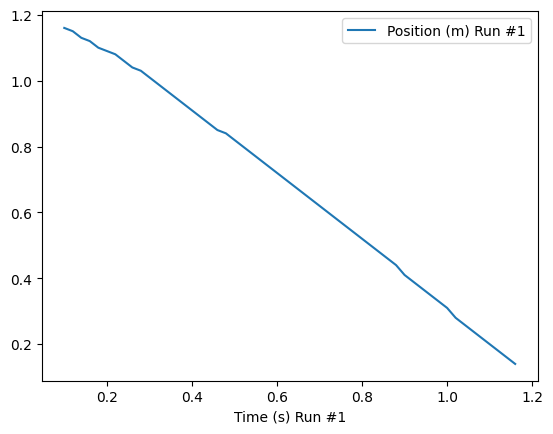

In [3]:
# second_experiment_df.dropna(inplace = True)

second_runs = {}


for i in range(1, 11):
    second_runs[f'run_{i}'] = second_experiment_df[[ f'Time (s) Run #{i}',f'Position (m) Run #{i}',f'Velocity (m/s) Run #{i}',f'Acceleration (m/s²) Run #{i}']]


for j in range(1, 11):
    drop_indices = [0, 1, 2, 3, 4]

    position_col = f'Position (m) Run #{j}'

    for i in range(34, len(second_runs[f'run_{j}']) - 1):
        if second_runs[f'run_{j}'][position_col].iloc[i + 1] > second_runs[f'run_{j}'][position_col].iloc[i]:
            drop_indices.extend((range(i, min(94, len(second_runs[f'run_{j}'])))))
    
        
    second_runs[f'run_{j}'] = second_runs[f'run_{j}'].drop(index = set(drop_indices), errors='ignore').drop_duplicates(subset = position_col)

second_runs['run_10']

# second_runs['run_9'].plot(x = 'Time (s) Run #9', y = 'Position (m) Run #9')


# second_runs['run_1'] = second_runs['run_1'].loc[second_runs['run_1'].index.difference(list(range()))]

# second_runs['run_3'] = second_runs['run_3'].loc[second_runs['run_3'].index.difference(list(range(33, 42)))]

# second_runs['run_4'] = second_runs['run_4'].loc[second_runs['run_4'].index.difference(list(range()))]

# second_runs['run_5'] = second_runs['run_5'].loc[second_runs['run_5'].index.difference(list(range()))]

# second_runs['run_6'] = second_runs['run_6'].loc[second_runs['run_6'].index.difference(list(range()))]

# second_runs['run_7'] = second_runs['run_7'].loc[second_runs['run_7'].index.difference(list(range()))]

# second_runs['run_8'] = second_runs['run_8'].loc[second_runs['run_8'].index.difference(list(range()))]

# second_runs['run_9'] = second_runs['run_9'].loc[second_runs['run_9'].index.difference(list(range()))]

# second_runs['run_10'] = second_runs['run_10'].loc[second_runs['run_10'].index.difference(list(range()))]

# second_runs['run_11'] = second_runs['run_11'].loc[second_runs['run_11'].index.difference(list(range()))]

# second_runs['run_12'] = second_runs['run_12'].loc[second_runs['run_11'].index.difference(list(range()))]



cleaned_second_exp = pd.concat(second_runs.values(), axis = 1)

cleaned_second_exp 

# cleaned_second_exp.to_csv('Coffee Filter 1.csv', index = False)

cleaned_second_exp.plot(x = 'Time (s) Run #1', y = 'Position (m) Run #1')

cleaned_second_exp.describe()
